# Análisis de Datos Faltantes  

In [1]:
# Librerias
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
#import session_info
import upsetplot

In [2]:
# linea para correr el notebook utils
%run utils.ipynb

## Datos. Descarga de archivos desde una URL

#### 1. Creamos unidades de informacion de los conjuntos de datos

In [3]:
# Guardar la url en una variable
datos_url = 'https://github.com/njtierney/naniar/raw/master/data/'

# Almacenar los nombres de los archivos a descargar en una lista
datasets_names = ('oceanbuoys', 'pedestrian', 'riskfactors')

# Almacenar el tipo de extension en una variable
extension = '.rda'

#### 2. Descargar y cargar los conjuntos de datos 

In [4]:
datasets_dfs = {} # diccionario que almacena los archivos descargados

for dataset_name in datasets_names:

    dataset_file = f'{ dataset_name }{ extension }' # almacena el nombre de cada archivo con su respectiva extension
    dataset_output_file = f'./data/{ dataset_file }' # ruta y nombre donde se guarda los arhcivos
    dataset_url = f'{ datos_url }{ dataset_file }' # url de cada archivo a descargar

    !wget -q -O { dataset_output_file } { dataset_url } # linea que descarga los archivos

    # almacenar en el diccionario los archivos descargados
    datasets_dfs[f'{ dataset_name }_df'] = pyreadr.read_r(dataset_output_file).get(dataset_name)

# accede a las llaves del diccionario para verificar que los archivos se hayan cargado
datasets_dfs.keys()

dict_keys(['oceanbuoys_df', 'pedestrian_df', 'riskfactors_df'])

#### 3. Incluir conjunto de datos en nuestro ambiente local

In [5]:
locals().update(**datasets_dfs)
del datasets_dfs # elimina el diccionario dejando los archivos df

In [6]:
riskfactors_df.shape, oceanbuoys_df.shape, pedestrian_df.shape

((245, 34), (736, 8), (37700, 9))

De esta manera podemos obtener varios archivos desde una URL y convertirlos en DataFrame para su procesamiento. El siguiente analisis de valores faltantes se haran sobre el dataframe de factores de riesgo 

## Resumen Basico de Valores Faltantes

In [7]:
# tamano del df
riskfactors_df.shape

(245, 34)

In [8]:
# Cantidad de valores en el dataframe
total = 245*34
total

8330

In [9]:
# Cantidad de valores completos
v_completo = riskfactors_df.missing.number_complete()
v_completo

7144

In [10]:
# Cantidad de valores faltantes
v_faltantes = riskfactors_df.missing.number_missing()
v_faltantes

1186

In [11]:
# Porcentaje de valores faltantes en el dataframe
pct_v = (v_faltantes/v_completo)*100
pct_v

16.601343784994402

Los calculos indican que el 16.6% de los datos son valores faltantes, lo cual puede llevar a resultados erroneos si no se toma en cuenta esta deficiencia en los datos.

#### Estadistica de las variables segun los datos faltantes

In [12]:
# Estadistica por variable de valores faltantes
riskfactors_df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


#### Tabla de valores faltantes sobre las variables

In [13]:
# Estadistica de valores faltantes sobre las variables tabuladas
riskfactors_df.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,0,10,29.411765
1,8,6,17.647059
2,2,4,11.764706
3,3,3,8.823529
4,1,2,5.882353
5,10,1,2.941176
6,11,1,2.941176
7,113,1,2.941176
8,128,1,2.941176
9,134,1,2.941176


La tabla anterior indica la cantidad de valores faltantes y el numero de variables que comparten dicho valor junto al porcentaje que representa tales variables respecto a las demas 

#### Resumen de valores faltantes por cada registro

In [14]:
riskfactors_df.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,6,16.666667
1,1,6,16.666667
2,2,7,19.444444
3,3,12,33.333333
4,4,5,13.888889
...,...,...,...
240,240,6,16.666667
241,241,5,13.888889
242,242,3,8.333333
243,243,2,5.555556


La tabla anterior indica la cantidad de valores faltantes por registro del dataframe

#### Tabla de valores faltantes sobre los registros

In [15]:
riskfactors_df.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,4,49,20.000000
1,5,45,18.367347
2,7,39,15.918367
3,6,36,14.693878
4,2,31,12.653061
5,3,30,12.244898
6,1,4,1.632653
7,8,3,1.224490
8,12,3,1.224490
9,15,2,0.816327


La tabla anterior indica la cantidad de valores faltante y el numero de registros que contienen dicha cantidad

#### Intervalos de valores faltantes

In [16]:
riskfactors_df.missing.missing_variable_span(variable='weight_lbs', span_every=50)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,1,49,2.000000,98.000000
1,1,5,45,10.000000,90.000000
2,2,1,49,2.000000,98.000000
3,3,1,49,2.000000,98.000000
4,4,2,43,4.444444,95.555556


La tabla anterior indica el numero de valores faltantes por cada 50 registros para la variable weight_lbs. Muestra el resumen de datos faltantes, datos completos, % de datos faltantes y % de datos completos por bloques de registros


#### Intervalos consecutivos de valores faltantes y completos

In [17]:
riskfactors_df.missing.missing_variable_run(variable='weight_lbs')

,run_length,is_na
0,14,complete
1,1,missing
2,45,complete
3,1,missing
4,5,complete
5,1,missing
6,12,complete
7,1,missing
8,10,complete
9,2,missing


La tabla anterior muestra el numero de registros consecutivos que estan completos seguido del numero de registros con valores faltantes. Esta funciones muy util cuando se trabaja con una serie de tiempo

## Visualizacion de valores faltantes

#### Configuracion General de las Graficas

In [18]:
%matplotlib inline

# tamaño de los graficos
sns.set(
    rc={
        'figure.figsize':(8, 8)
    }
)

# estilo de los graficos
sns.set_style('whitegrid')

#### Visualizacion de valores faltantes para cada variable mediante un grafico de paleta

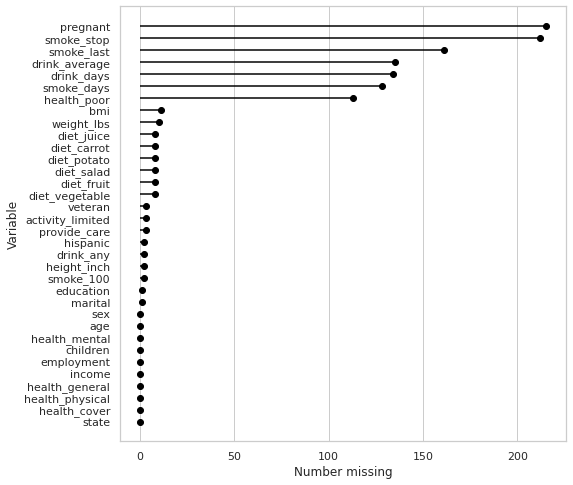

In [19]:
riskfactors_df.missing.missing_variable_plot()

 La grafica muestra que la variable pregnant es la que mayor cantidad de valores faltantes tiene, seguido de las variables smoke_stop y smoke_last

#### Histograma de la cantidad de observaciones con datos faltantes

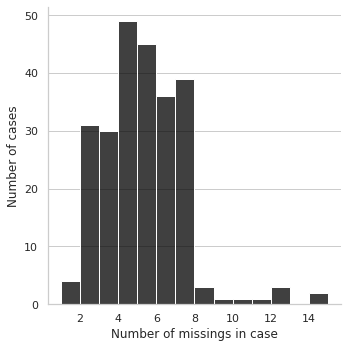

In [20]:
riskfactors_df.missing.missing_case_plot()

La grafica muestra la cantidad de observaciones y su respectiva cantidad de valores faltantes. Para este caso vemos que existen alrededor de 49 observaciones con 5 valores faltantes y 45 con 6 valores faltantes.

#### Visualizacion de datos faltantes para un rango especifico de observaciones para una variable especifica

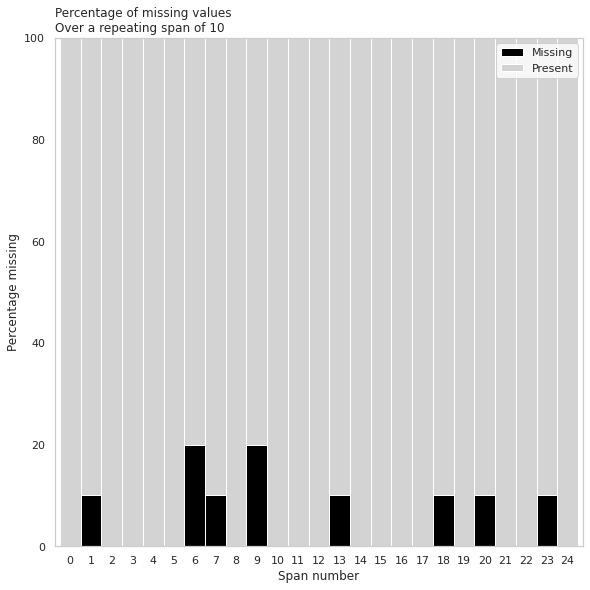

In [21]:
(
    riskfactors_df
    .missing
    .missing_variable_span_plot(
        variable='weight_lbs', # variable a analizar
        span_every=10, # rango de registros
        rot=0 # rotacion de las etiquetas
    )
)

La grafica muestra la proporcion de datos faltantes por cada 10 registros de la variable weight_lbs. Observamos que entre los registros que van del 60 al 69 hay un 20% de los datos que son valores faltantes; lo mismo sucede con los registros que van del 90 al 99. 

#### Visualizacion de datos faltantes para todas las variables del DataFrame

<AxesSubplot:>

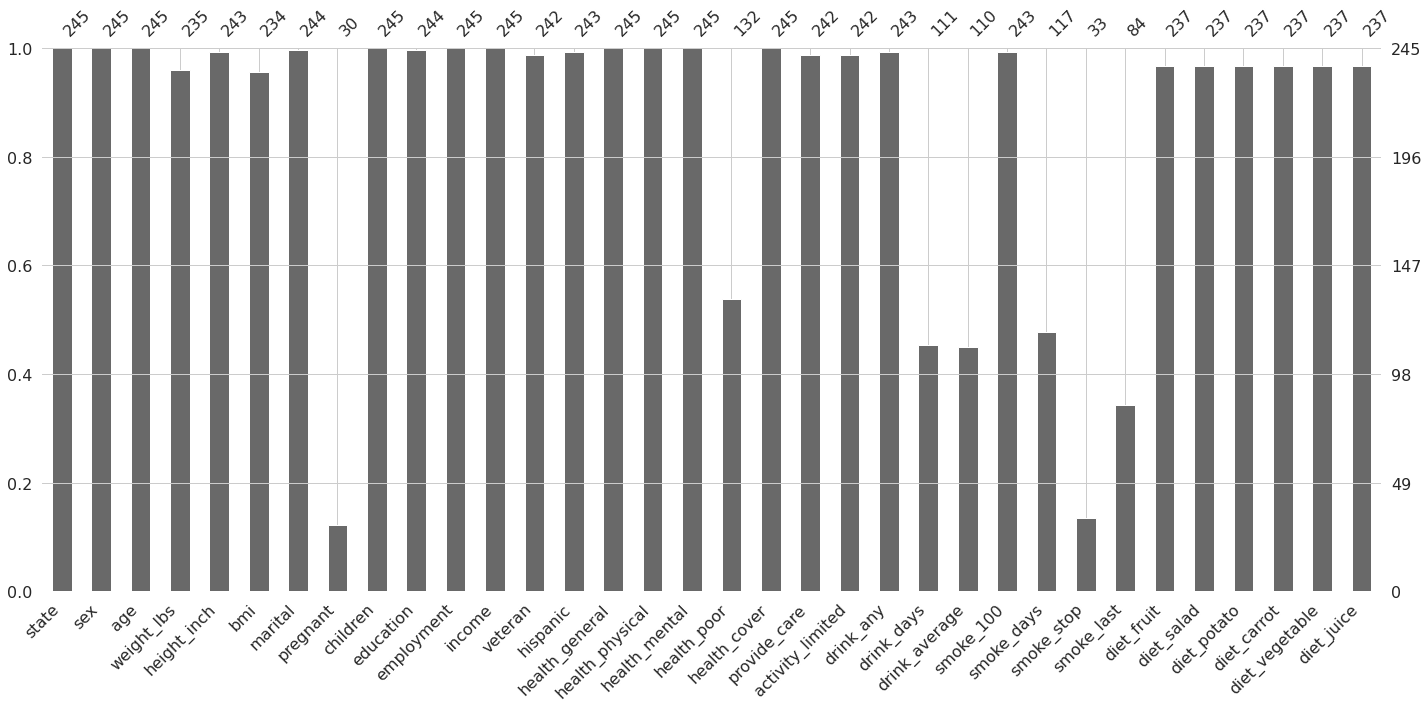

In [22]:
# missigno es una funcion de pandas
missingno.bar(df = riskfactors_df)

La grafica representa los datos faltantes con espacio en blanco por lo que podemos confirmar que las variables como pregnant, smoke_stop y smoke_last son las que mayor cantidad de valores faltantes contiene

#### Visualizacion de datos faltantes para cada variable mediante una Matriz

<AxesSubplot:>

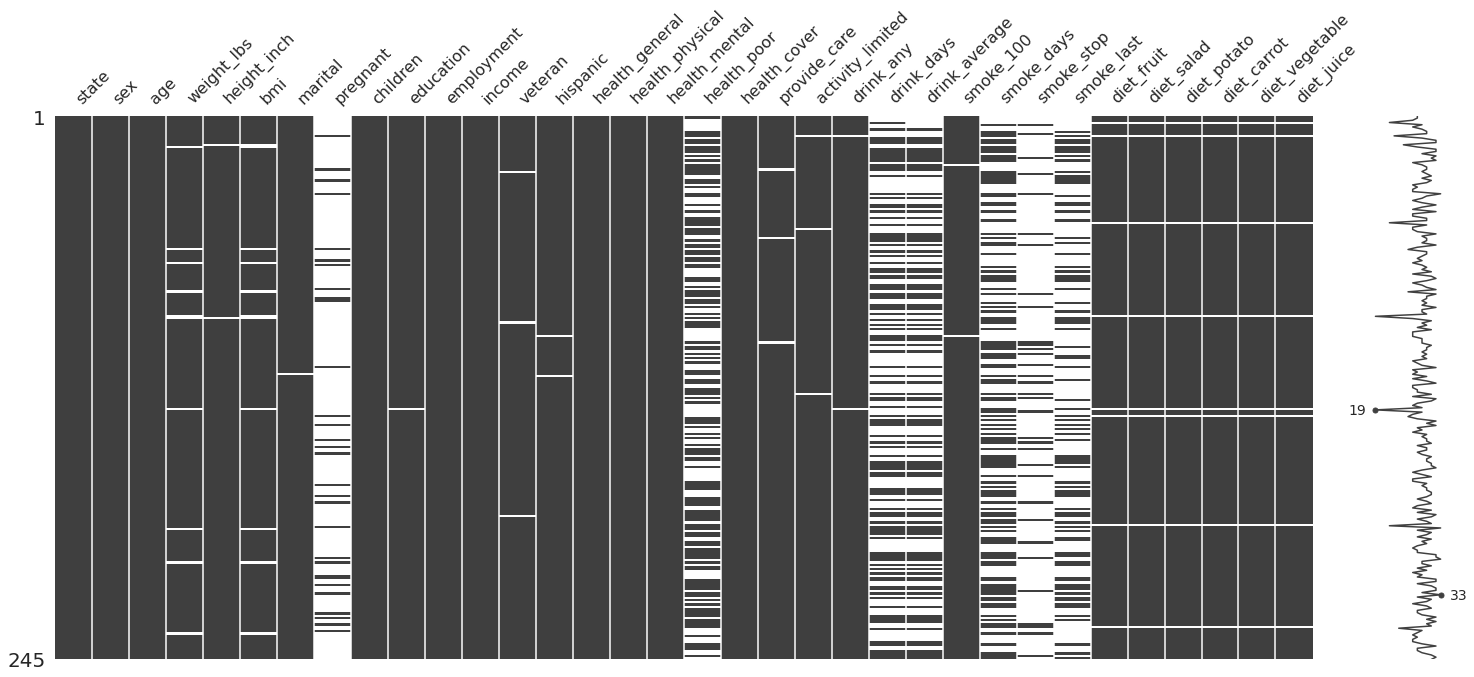

In [23]:
# es una funcion de pandas
missingno.matrix(df = riskfactors_df)

La matriz muestra las variables donde las zonas blancas son valores faltantes. Podemos observar como la variable pregnant es la que mayor cantidad de valores faltantes tiene. Ademas podemos notar que las variables drink_days y drink_average estan relacionadas debido a que muestran un patron muy similar en sus valores faltantes. La grafica tambien muestra picos al lado derecho los cuales representan observaciones donde hay mayor cantidad de valores faltantes 